In [2]:
import random as r

In [4]:
def Random_korobki(colichestvo,min_storona_a=1,max_storona_a=100,min_storona_b=1,max_storona_b=100,min_cena=1,max_cena=100):
    korobki=[[0] * 3 for i in range(0,colichestvo)]
    for i in range(0,colichestvo):
        korobki[i][0]=r.randint(min_storona_a,max_storona_a)
        korobki[i][1]=r.randint(min_storona_b,max_storona_b)
        korobki[i][2]=r.randint(min_cena,max_cena)
    return(korobki)

In [44]:
def Algoritm_Zadnosti(boxes,VbIsota,Shirina):
    num_box=[]
    for i in range(0,len(boxes)):
        num_box.append(i+1)
    boxes_inside=[]
    container = [[0 for j in range(Shirina)] for i in range(VbIsota)]
    dp=[0]*len(boxes)
    for i in range(0,len(boxes)):
        dp[i]=boxes[i][2]/(boxes[i][0]*boxes[i][1])
    for i in range(len(boxes)-1,0,-1):
        for j in range(len(boxes)-i-1, -1,-1):
            if dp[j]<dp[j+1]:
                dp[j],dp[j+1]=dp[j+1],dp[j]
                boxes[j],boxes[j+1]=boxes[j+1],boxes[j]
                num_box[j],num_box[j+1]=num_box[j+1],num_box[j]
    for k in range(0,len(boxes)):
        proverka=0
        for i in range(0,VbIsota+1-boxes[k][0]):
            for j in range(0,Shirina+1-boxes[k][1]):
                temp=1
                for x in range(0,boxes[k][0]):
                    if (temp==0):
                        break
                    for y in range(0,boxes[k][1]):
                        if (container[i+x][j+y]!=0):
                            temp=0
                            break
                    else:
                        continue
                    break
                if (temp==1):
                    boxes_inside.append([num_box[k],k+1])
                    for x in range(boxes[k][0]):
                        for y in range(boxes[k][1]):
                            container[i+x][j+y]=num_box[k]
                            proverka=1
                    break
            if (proverka==1):
                break
    print()
    print('[',end=' ')
    for i in range(0,len(boxes_inside)-1):
        print(boxes_inside[i][0],end=' , ')
    print(boxes_inside[len(boxes_inside)-1][0],end=' ')
    print(']')
    print()
    
    for i in range(VbIsota):
        for j in range(Shirina):
            print('{:<2}'.format(container[i][j]), end=' ')
        print()
    cost=0
    for i in range(0,len(boxes_inside)):
        cost+=boxes[boxes_inside[i][1]-1][2]
    print()
    return(cost)    

In [8]:
def _3adacha_o_Korobke(boxes,VbIsota,Shirina):
    dp = [[[0 for j in range(Shirina+1)] for i in range(VbIsota+1)] for i in range(0,2)]
    for box in boxes:
        for i in range(1, VbIsota+1):
            for j in range(1, Shirina+1):
                if box[0] <= i and box[1] <= j:
                    
                    if(dp[0][i-box[0]][j] + box[2]>=dp[0][i][j-box[1]] + box[2]):
                        if(dp[0][i-box[0]][j] + box[2]>=dp[0][i-box[0]][j-box[1]] + box[2]):
                            cost = dp[0][i-box[0]][j] + box[2]
                        else:
                            cost = dp[0][i-box[0]][j-box[1]] + box[2]
                    else:
                        if(dp[0][i][j-box[1]] + box[2]>=dp[0][i-box[0]][j-box[1]] + box[2]):
                            cost = dp[0][i][j-box[1]] + box[2]
                        else:
                            cost = dp[0][i-box[0]][j-box[1]] + box[2]
                    if cost > dp[0][i][j]:
                        dp[1][i][j] = cost
        for i in range(0,len(dp[0])):
            dp[0][i]=dp[1][i].copy()
#    print(dp[0][VbIsota][Shirina]) 
    return(dp[0][VbIsota][Shirina])

In [27]:
def Nemnogo_ly4IIIe(boxes,VbIsota,Shirina):
    boxes.insert(0,[0,0,0])
    dp = [[[[0] for j in range(Shirina+1)] for i in range(VbIsota+1)] for i in range(0,2)]
    for k in range(1,len(boxes)):
        for i in range(1, VbIsota+1):
            for j in range(1, Shirina+1):
                if boxes[k][0] <= i and boxes[k][1] <= j:
                    temp_box=[[],[]]
                    temp=[0,0,0]
                    Not_uniq_boxes=dp[0][i-boxes[k][0]][j]+dp[0][boxes[k][0]][j-boxes[k][1]]
                    for box in Not_uniq_boxes:
                        if (box in temp_box[0])==False:
                            temp_box[0].append(box)
                    Not_uniq_boxes=dp[0][i][j-boxes[k][1]]+dp[0][i-boxes[k][0]][boxes[k][1]]
                    for box in Not_uniq_boxes:
                        if (box in temp_box[1])==False:
                            temp_box[1].append(box)
                    for l in range(0,len(temp_box[0])):
                        temp[0]+=boxes[temp_box[0][l]][2]
                    for l in range(0,len(temp_box[1])):
                        temp[1]+=boxes[temp_box[1][l]][2]
                    for l in range(0,len(dp[0][i][j])):
                        temp[2]+=boxes[dp[0][i][j][l]][2]
                    if(temp[0] + boxes[k][2]>=temp[1] + boxes[k][2]):
                        if temp[0] + boxes[k][2] >= temp[2]:
                            dp[1][i][j] = temp_box[0].copy()
                            dp[1][i][j].append(k)
                    else:
                        if temp[1] + boxes[k][2] >= temp[2]:
                            dp[1][i][j] = temp_box[1].copy()
                            dp[1][i][j].append(k)
        for i in range(0,len(dp[0])):
            for j in range(0,len(dp[0][0])):
                dp[0][i][j]=dp[1][i][j].copy()
    print()

    print(dp[0][len(dp[0])-1][len(dp[0][0])-1])
#    for k in range (1,len(dp[0])):
#        for l in range(1,len(dp[0][0])):
#            print(dp[0][k][l],end=' | ')
#        print()
#        print('-----------------------------------------')
    print()   
    cost=0
    for i in range(0,len(dp[0][VbIsota][Shirina])):
        cost+=boxes[dp[0][VbIsota][Shirina][i]][2]
#    print(cost) 
    boxes.pop(0)
    return(cost)

In [152]:
#boxes = Random_korobki(10,1,6,1,6,1,50)
for i in range (0,len(boxes)):
    print(i+1,' - ',boxes[i])
a=6
b=6
sp1=_3adacha_o_Korobke(boxes,a,b)

1  -  [1, 3, 4]
2  -  [2, 2, 5]
3  -  [3, 1, 3]
4  -  [1, 1, 1]
5  -  [4, 2, 8]
6  -  [2, 4, 7]
7  -  [3, 5, 12]
8  -  [5, 4, 15]
9  -  [6, 3, 10]
10  -  [5, 1, 2]


In [153]:
#boxes = Random_korobki(30,1,3,1,3,1,50)
for i in range (0,len(boxes)):
    print(i+1,' - ',boxes[i])
a=6
b=6
sp2=Nemnogo_ly4IIIe(boxes,a,b)-

1  -  [1, 3, 4]
2  -  [2, 2, 5]
3  -  [3, 1, 3]
4  -  [1, 1, 1]
5  -  [4, 2, 8]
6  -  [2, 4, 7]
7  -  [3, 5, 12]
8  -  [5, 4, 15]
9  -  [6, 3, 10]
10  -  [5, 1, 2]


In [178]:
raznica=0
naglydno=[0]*1000

In [200]:
a=6
b=6

for i in range(0,5000):
    boxes = Random_korobki(30,1,3,1,3,1,50)
    raznica+=Nemnogo_ly4IIIe(boxes,a,b)-_3adacha_o_Korobke(boxes,a,b)
    naglydno[Nemnogo_ly4IIIe(boxes,a,b)-_3adacha_o_Korobke(boxes,a,b)]+=1

KeyboardInterrupt: 

In [184]:
print(raznica/5000)

45.9748


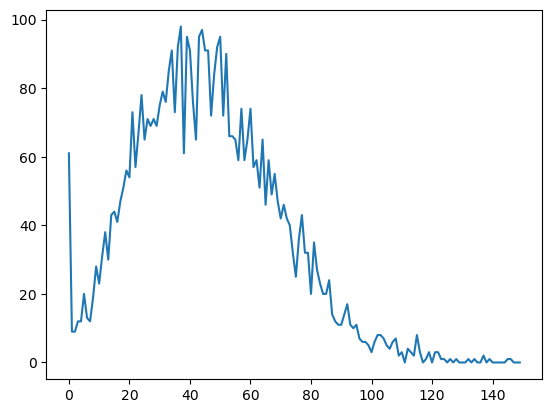

In [195]:
x=[]
for i in range(0,len(naglydno)):
    x.append(i)
import matplotlib.pyplot as plt
plt.plot(x,naglydno)
plt.show()

In [196]:
import numpy as np
def ap(x):
    ap1=[[0]*x for i in range(x)]
    ap2=[0]*x
    ap3=[0]*x
    for i in range (0,x):
        for j in range (0,x):
            for k in range (0,len(naglydno)):
                ap1[i][j]+=(k)**(i+j)
    for i in range (0,x):
        for k in range (0,len(naglydno)):
            ap3[i]+=naglydno[k]*(k)**i
    ap2=np.linalg.inv (ap1). dot (ap3)
    return(ap2)
def F_ap(x,t):
    temp=0
    for i in range (0,t):
        temp+=l[i]*x**i
    return(temp)

In [197]:
l=ap(4)

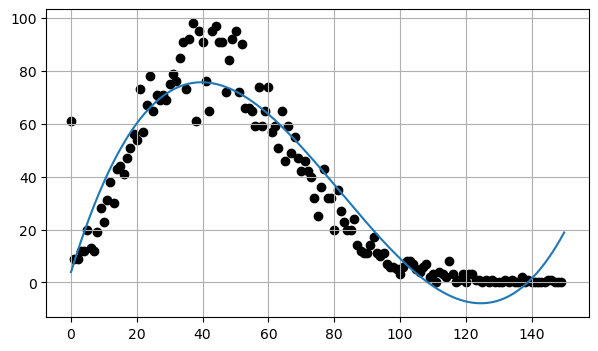

In [199]:
import matplotlib.pyplot as plt
x=[]
F=[]
it=0
for i in range(0,len(naglydno)*10):
    x.append(i*0.1)
for i in range(0,len(x)):
    F.append(F_ap(i*0.1,4))
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
for i in range(0, len(naglydno)):
    plt.scatter(x[i*10], naglydno[i], color='black')
    
ax.grid()
#ax.set(ylim=(-40, 0))
plt.plot(x,F)
plt.show()

In [16]:
raznica=0
naglydno=[0]*10000

In [25]:
a=40
b=40

for i in range(0,100):
    boxes = Random_korobki(100,1,30,1,30,1,500)
    temp=Nemnogo_ly4IIIe(boxes,a,b)-_3adacha_o_Korobke(boxes,a,b)
    raznica+=temp
    naglydno[temp]+=1

In [26]:
print(raznica/500)

844.054


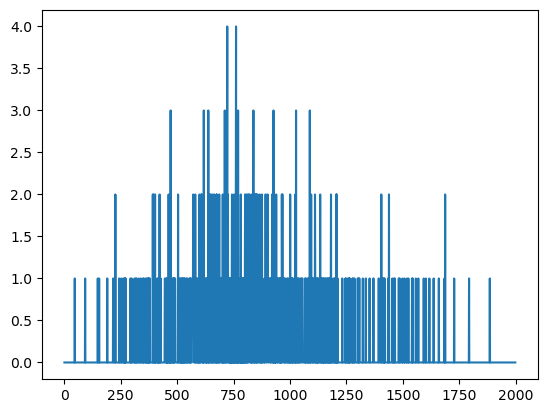

In [35]:
x=[]
for i in range(0,len(naglydno)):
    x.append(i)
import matplotlib.pyplot as plt
plt.plot(x,naglydno)
plt.show()

In [89]:
raznica=0
for i in range(0,len(naglidno)):
    raznica+=naglidno[i]
raznica/=len(naglidno)
print(raznica)

0.076


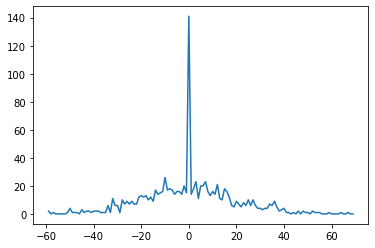

In [90]:
x=[]
for i in range(0,len(naglidno_1)):
    x.append(min(naglidno)+i)
import matplotlib.pyplot as plt
plt.plot(x,naglidno_1)
plt.show()

In [77]:
raznica=0
temp=[]

In [78]:
for i in range(0,10000):
    boxes = Random_korobki(30,1,10,1,10,1,100)
    t=Nemnogo_ly4IIIe(boxes,10,10)-Algoritm_Zadnosti_moi(boxes,10,10)
    raznica+=t
    temp.append(t)

In [79]:
print(raznica/10000)

-4.0031


In [80]:
naglidno=[0]*(max(temp)-min(temp))
for i in range(min(temp),max(temp)):
    naglidno[temp[i]-min(temp)]+=1

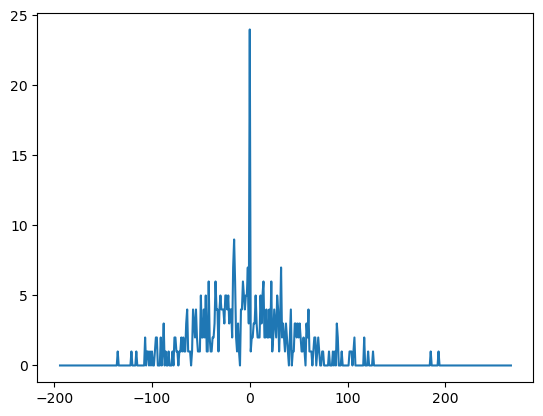

In [83]:
x=[]
for i in range(0,len(naglidno)):
    x.append(min(temp)+i)
import matplotlib.pyplot as plt
plt.plot(x,naglidno)
plt.show()

In [ ]:
raznica=0
temp=[]

In [85]:
for i in range(0,1000):
    boxes = Random_korobki(50,1,30,1,30,1,100)
    t=Nemnogo_ly4IIIe(boxes,30,30)-Algoritm_Zadnosti_moi(boxes,30,30)
    raznica+=t
    temp.append(t)

In [87]:
print(raznica/1000)

-50.26


In [88]:
naglidno=[0]*(max(temp)-min(temp))
for i in range(min(temp),max(temp)):
    naglidno[temp[i]-min(temp)]+=1

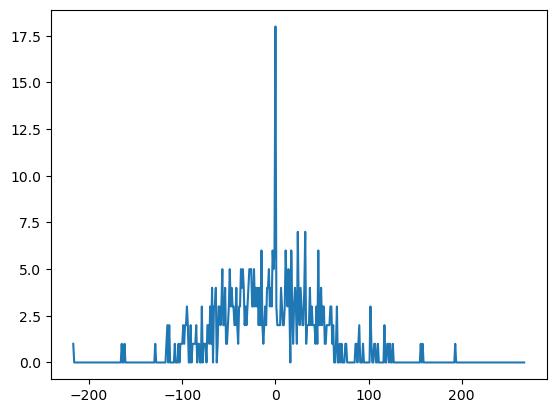

In [89]:
x=[]
for i in range(0,len(naglidno)):
    x.append(min(temp)+i)
import matplotlib.pyplot as plt
plt.plot(x,naglidno)
plt.show()

In [1]:
raznica=0
temp=[]

In [10]:
for i in range(0,1000):
    boxes = Random_korobki(200,1,10,1,10,1,100)
    t=Nemnogo_ly4IIIe(boxes,10,10)-Algoritm_Zadnosti_moi(boxes,10,10)
    raznica+=t
    temp.append(t)

In [17]:
print(raznica/1000)
naglidno=[0]*(max(temp)-min(temp)+1)
for i in range(min(temp),max(temp)):
    naglidno[temp[i]-min(temp)]+=1

-189.727


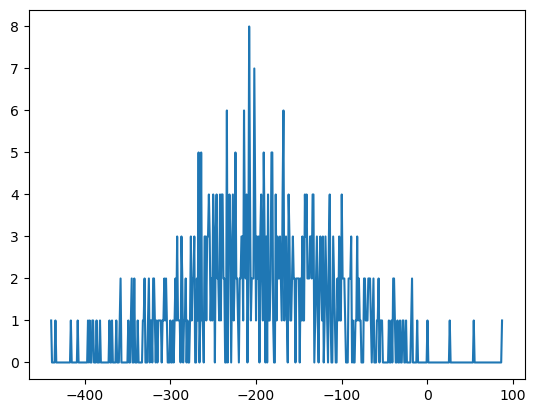

In [18]:
x=[]
for i in range(0,len(naglidno)):
    x.append(min(temp)+i)
import matplotlib.pyplot as plt
plt.plot(x,naglidno)
plt.show()

In [52]:
boxes=Random_korobki(50,1,6,1,6,1,100)
for i in range(0,len(boxes)):
    print(i+1,' - ',boxes[i])


print(Nemnogo_ly4IIIe(boxes,6,6))
print()
print()
print(Algoritm_Zadnosti(boxes,6,6))

1  -  [5, 2, 84]
2  -  [3, 1, 57]
3  -  [2, 4, 69]
4  -  [3, 4, 9]
5  -  [4, 2, 89]
6  -  [4, 3, 59]
7  -  [1, 4, 5]
8  -  [2, 5, 60]
9  -  [2, 5, 37]
10  -  [4, 1, 28]
11  -  [2, 1, 98]
12  -  [4, 2, 23]
13  -  [6, 6, 34]
14  -  [4, 5, 30]
15  -  [1, 4, 57]
16  -  [1, 2, 35]
17  -  [3, 4, 55]
18  -  [2, 3, 71]
19  -  [5, 6, 93]
20  -  [4, 2, 42]
21  -  [5, 5, 17]
22  -  [1, 1, 31]
23  -  [2, 4, 51]
24  -  [1, 5, 88]
25  -  [3, 3, 75]
26  -  [1, 3, 35]
27  -  [2, 1, 90]
28  -  [2, 1, 68]
29  -  [3, 1, 19]
30  -  [5, 6, 30]
31  -  [1, 5, 79]
32  -  [1, 1, 71]
33  -  [2, 4, 18]
34  -  [1, 6, 27]
35  -  [3, 2, 90]
36  -  [3, 3, 92]
37  -  [4, 4, 11]
38  -  [5, 5, 51]
39  -  [3, 5, 87]
40  -  [5, 1, 32]
41  -  [2, 6, 89]
42  -  [1, 5, 30]
43  -  [1, 5, 3]
44  -  [4, 2, 70]
45  -  [5, 5, 93]
46  -  [4, 3, 53]
47  -  [3, 5, 37]
48  -  [3, 5, 97]
49  -  [1, 2, 19]
50  -  [4, 1, 15]

[0, 24, 2, 11, 22, 27, 28, 29, 31, 26, 32, 40]

668



[ 32 , 11 , 27 , 28 , 22 , 2 , 24 , 16 , 31 , 15 , 26 , 